# **Prototyping Notebook**
This Jupyter notebook is intended for prototyping

**It is NOT clean code**

In [26]:
from transformers import pipeline
from PIL import Image, ImageDraw
import numpy as np


In [27]:
classifier = pipeline(
    "text-classification",
    model="j-hartmann/emotion-english-distilroberta-base",
    top_k=None,
)


In [28]:
# Step 1: Assign colors to emotions
emotions_colors = {
    "joy": "#FFFF00",  # yellow
    "surprise": "#FFA500",  # orange
    "neutral": "#FFF0DB",  # beige
    "anger": "#FF0000",  # red
    "sadness": "#0000FF",  # blue
    "disgust": "#008000",  # green
    "fear": "#800080",  # purple
}


In [50]:
def create_gradient(color1, color2, percentage_transition_point, steepness, width=256, height=256):
    # Calculate where the transition should occur
    transition_height = round(percentage_transition_point * height)

    image = Image.new("RGB", (width, height))
    draw = ImageDraw.Draw(image)

    for i in range(height):
        # Calculate ratio based on steepness
        ratio = 1 / (1 + np.exp(-steepness * (i - transition_height) / height))

        r = round((1 - ratio) * int(color1[1:3], 16) + ratio * int(color2[1:3], 16))
        g = round((1 - ratio) * int(color1[3:5], 16) + ratio * int(color2[3:5], 16))
        b = round((1 - ratio) * int(color1[5:7], 16) + ratio * int(color2[5:7], 16))

        draw.line([(0, i), (width, i)], fill=(r, g, b))

    return image


classifier_output=[{'label': 'joy', 'score': 0.9869452118873596}, {'label': 'sadness', 'score': 0.00526200607419014}, {'label': 'neutral', 'score': 0.003703388851135969}, {'label': 'disgust', 'score': 0.0014679300365969539}, {'label': 'surprise', 'score': 0.001343347248621285}, {'label': 'anger', 'score': 0.0008928669849410653}, {'label': 'fear', 'score': 0.00038523090188391507}]
first_emotion='joy'
second_emotion='sadness'
score_first_emotion=0.9869452118873596
score_second_emotion=0.00526200607419014


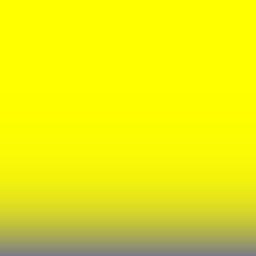

In [57]:
# Assume classifier_output is the output from your classifier
classifier_output = classifier("I feel so good")[0]

# Step 2: Sort the emotions
sorted_emotions = sorted(classifier_output, key=lambda x: x["score"], reverse=True)

# Get the colors of the top 2 emotions
first_emotion = sorted_emotions[0]["label"]
second_emotion = sorted_emotions[1]["label"]

score_first_emotion = sorted_emotions[0]["score"]
score_second_emotion = sorted_emotions[1]["score"]

color_first_emotion = emotions_colors[first_emotion]
color_second_emotion = emotions_colors[second_emotion]

# Step 3: Create a gradient
width, height = 256, 256
image = Image.new("RGB", (width, height))
draw = ImageDraw.Draw(image)


print(f"{classifier_output=}")
print(f"{first_emotion=}")
print(f"{second_emotion=}")
print(f"{score_first_emotion=}")
print(f"{score_second_emotion=}")

image = create_gradient(color_first_emotion, color_second_emotion, score_first_emotion, 10)
display(image)

<br><br><br><br>

___

<br><br><br><br>

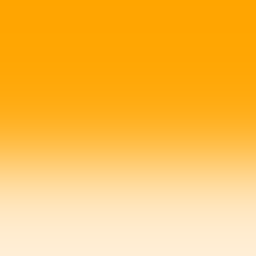

In [65]:
from typing import Dict, List, Tuple, Union
from transformers import pipeline, Pipeline
from PIL import Image, ImageDraw
import numpy as np


def initialize_classifier(
    model_name: str = "j-hartmann/emotion-english-distilroberta-base", top_k: int = None
) -> Pipeline:
    """
    Initialize text classification pipeline with specified model.

    Args:
    model_name (str): Model name to use for classification.
    top_k (int, optional): The number of top categories to return.

    Returns:
    classifier (Pipeline): Initialized text classification pipeline.

    Example:
    >>> classifier = initialize_classifier("j-hartmann/emotion-english-distilroberta-base", None)
    """
    return pipeline(
        "text-classification",
        model=model_name,
        top_k=top_k,
    )


def create_gradient(
    color1: str,
    color2: str,
    percentage_transition_point: float,
    steepness: float,
    width: int = 256,
    height: int = 256,
) -> Image:
    """
    Create an image with a gradient transition between two colors.

    Args:
    color1 (str): The starting color, in RGB hex format.
    color2 (str): The ending color, in RGB hex format.
    percentage_transition_point (float): The transition point in the image (0-1 scale) for color change.
    steepness (float): The steepness of the gradient transition.
    width (int, optional): The width of the image. Default is 256.
    height (int, optional): The height of the image. Default is 256.

    Returns:
    image (Image): An image with a gradient transition.

    Example:
    >>> create_gradient("#FFFFFF", "#000000", 0.5, 10)
    """
    transition_height = round(percentage_transition_point * height)

    image = Image.new("RGB", (width, height))
    draw = ImageDraw.Draw(image)

    for i in range(height):
        ratio = 1 / (1 + np.exp(-steepness * (i - transition_height) / height))

        r = round((1 - ratio) * int(color1[1:3], 16) + ratio * int(color2[1:3], 16))
        g = round((1 - ratio) * int(color1[3:5], 16) + ratio * int(color2[3:5], 16))
        b = round((1 - ratio) * int(color1[5:7], 16) + ratio * int(color2[5:7], 16))

        draw.line([(0, i), (width, i)], fill=(r, g, b))

    return image


def emotion_gradient(
    emotions_colors: Dict[str, str],
    text: str,
    classifier: Pipeline,
    steepness: float = 10,
    width: int = 256,
    height: int = 256,
) -> Image:
    """
    Create an emotion gradient image based on the sentiment of the text.

    Args:
    emotions_colors (dict): A dictionary mapping emotions to colors.
    text (str): The text to analyze.
    classifier (Pipeline): The text classification pipeline.
    steepness (float, optional): The steepness of the gradient transition. Default is 10.
    width (int, optional): The width of the image. Default is 256.
    height (int, optional): The height of the image. Default is 256.

    Returns:
    image (Image): An emotion gradient image.

    Example:
    >>> emotion_gradient({"joy": "#FFFF00", "neutral": "#FFF0DB"}, "I feel so good", classifier)
    """
    classifier_output = classifier(text)[0]

    sorted_emotions = sorted(classifier_output, key=lambda x: x["score"], reverse=True)

    first_emotion = sorted_emotions[0]["label"]
    second_emotion = sorted_emotions[1]["label"]

    score_first_emotion = sorted_emotions[0]["score"]
    score_second_emotion = sorted_emotions[1]["score"]

    color_first_emotion = emotions_colors.get(first_emotion)
    color_second_emotion = emotions_colors.get(second_emotion)

    if not color_first_emotion or not color_second_emotion:
        raise ValueError("One or more emotion colors not found in emotions_colors dictionary")

    image = create_gradient(
        color_first_emotion, color_second_emotion, score_first_emotion, steepness, width, height
    )
    return image


def main():
    emotions_colors = {
        "joy": "#FFFF00",  # yellow
        "surprise": "#FFA500",  # orange
        "neutral": "#FFF0DB",  # beige
        "anger": "#FF0000",  # red
        "sadness": "#0000FF",  # blue
        "disgust": "#008000",  # green
        "fear": "#800080",  # purple
    }

    classifier = initialize_classifier()
    image = emotion_gradient(emotions_colors, "woah", classifier)
    display(image)


main()


<br><br><br><br>

___

<br><br><br><br>

In [80]:
# Prediction interface for Cog ⚙️
# https://github.com/replicate/cog/blob/main/docs/python.md

from cog import BasePredictor, Input, Path
from pathlib import Path as PathlibPath
from typing import Dict, List, Union
from transformers import pipeline
from PIL import Image, ImageDraw
import numpy as np


class Predictor(BasePredictor):
    def setup(self):
        self.text_to_emotions_model = pipeline(
            model="j-hartmann/emotion-english-distilroberta-base",
            top_k=2,
        )
        self.emotions_colors = {
            "joy": "#FFFF00",  # yellow
            "surprise": "#FFA500",  # orange
            "neutral": "#FFF0DB",  # beige
            "anger": "#FF0000",  # red
            "sadness": "#0000FF",  # blue
            "disgust": "#008000",  # green
            "fear": "#800080",  # purple
        }
        self.output_path_str = "./outputs"
        PathlibPath(self.output_path_str).mkdir(parents=True, exist_ok=True)

    def _create_gradient(
        self,
        top_color: str,
        bottom_color: str,
        percentage_transition_point: float,
        steepness: float,
        width: int = 256,
        height: int = 256,
    ) -> Image:
        transition_height = round(percentage_transition_point * height)
        image = Image.new("RGB", (width, height))
        draw = ImageDraw.Draw(image)
        for i in range(height):
            ratio = 1 / (1 + np.exp(-steepness * (i - transition_height) / height))
            r = round((1 - ratio) * int(top_color[1:3], 16) + ratio * int(bottom_color[1:3], 16))
            g = round((1 - ratio) * int(top_color[3:5], 16) + ratio * int(bottom_color[3:5], 16))
            b = round((1 - ratio) * int(top_color[5:7], 16) + ratio * int(bottom_color[5:7], 16))
            draw.line([(0, i), (width, i)], fill=(r, g, b))
        return image

    def emotions_to_colorgrad(
        self,
        emotions: List[Dict[str, Union[str, float]]],
        steepness: float = 10,
        width: int = 256,
        height: int = 256,
    ) -> Image:
        sorted_emotions = sorted(emotions, key=lambda x: x["score"], reverse=True)
        top_emotion = sorted_emotions[0]["label"]
        bottom_emotion = sorted_emotions[1]["label"]
        score_top_emotion = sorted_emotions[0]["score"]
        color_top_emotion = self.emotions_colors.get(top_emotion)
        color_bottom_emotion = self.emotions_colors.get(bottom_emotion)
        if not color_top_emotion or not color_bottom_emotion:
            raise ValueError("One or more emotion colors not found in emotions_colors dictionary")
        image = self._create_gradient(
            color_top_emotion,
            color_bottom_emotion,
            score_top_emotion,
            steepness,
            width,
            height,
        )
        print(f"{'='*80}")
        print(f"{sorted_emotions=}")
        print(f"({color_top_emotion}) {top_emotion=}")
        print(f"({color_bottom_emotion}) {bottom_emotion=}")
        print(f"{'='*80}")
        return image

    def predict(
        self,
        text: str = Input(
            description="A sentence which we'd like to classify the emotion for to generate a colour (two-tone gradient)"
        ),
    ) -> Path:
        emotions = self.text_to_emotions_model(text)[0]
        image = self.emotions_to_colorgrad(emotions)
        image_file_path = PathlibPath(self.output_path_str + "/emotion_gradient.png")
        image.save(image_file_path)
        return Path(image_file_path)



p = Predictor()
p.setup()
p.predict("I like you")

sorted_emotions=[{'label': 'joy', 'score': 0.9625167846679688}, {'label': 'neutral', 'score': 0.013259436003863811}]
(#FFFF00) top_emotion='joy'
(#FFF0DB) bottom_emotion='neutral'


Path('outputs/emotion_gradient.png')